<a href="https://colab.research.google.com/github/SamPetkov/PartialCoalescence/blob/main/TimeDiameterDroplet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Constants + Time variables

In [2]:
#Constants
sigma12 = 22e-3
rho_l = 786.
Mu_l = 0.00105

D0 = 1.07e-3
Oh0 = Mu_l/np.sqrt(rho_l*sigma12*D0)


TAU = np.sqrt((rho_l*D0**(3))/(sigma12))
V = np.pi/6

#Results
D = np.array([1.07,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2])*1e-3
Tau_D = np.sqrt((rho_l*D**(3))/(sigma12))
Oh = Mu_l/np.sqrt(rho_l*sigma12*D)
# no pinch off for D = 0.1
t_pinch_off_D = np.array([0.551,np.nan,0.652,0.611,0.596,0.588,0.581,0.577,0.573,0.570,0.567,0.566,0.563,0.561,0.560,0.558,0.557,0.556,0.554,0.553,0.551,0.549,0.546,0.545,0.543, 0.540,0.538, 0.537, 0.533,0.532, 0.528, 0.527 ])
t_pinch_off_SI = t_pinch_off_D*Tau_D[0:len(t_pinch_off_D)]


Diameter ratio

In [3]:
V_daughter = np.array([0.103866,np.nan,0.0716361,0.0801617,0.0852394,0.0885862,0.0914374,0.0934793,0.0952873,0.096778,0.09772,0.0990827,0.101048,0.101313,0.102207,0.10346,0.103655,0.103975,0.104351,0.104843,0.105907,0.105907,0.105907,0.105907,0.105907,0.105907, 0.105907,0.105907,0.105907,0.105907,0.105907,0.105907])
# Note - for gird level 10 we fractional pixels have a substantial effect on the volume calculaed
D_daughter = np.cbrt(V_daughter/V)

d_Oh = np.cbrt(1-(3/8)*(Oh+np.sqrt(Oh**2+4)))

D_daughter_frame = np.array([0.690,1,0.696,0.678,0.680,0.649,0.682,0.664,0.687,0.682,0.682,0.670,0.670,0.670,0.666,0.666,0.666,0.666,0.700,0.685,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700])

In [4]:
print(len(D_daughter)/len(D_daughter_frame))
print(Oh0)
print(D_daughter[0])
print(d_Oh[0])

1.0
0.0077192444958885924
0.5832099545473411
0.6275149413781771


In [5]:
print(D_daughter )
print(t_pinch_off_D)
print(t_pinch_off_SI)

[0.58320995        nan 0.51528137 0.53496179 0.54602675 0.55308152
 0.55895273 0.56308282 0.56668989 0.56962976 0.57147199 0.57411611
 0.57788714 0.57839188 0.58008817 0.58244906 0.58281476 0.5834139
 0.58411631 0.58503288 0.58700529 0.58700529 0.58700529 0.58700529
 0.58700529 0.58700529 0.58700529 0.58700529 0.58700529 0.58700529
 0.58700529 0.58700529]
[0.551   nan 0.652 0.611 0.596 0.588 0.581 0.577 0.573 0.57  0.567 0.566
 0.563 0.561 0.56  0.558 0.557 0.556 0.554 0.553 0.551 0.549 0.546 0.545
 0.543 0.54  0.538 0.537 0.533 0.532 0.528 0.527]
[0.00364525        nan 0.0002264  0.00032665 0.0004453  0.00057751
 0.00071908 0.0008725  0.00103389 0.00120456 0.00138238 0.00157233
 0.00176351 0.00196386 0.0021741  0.00238654 0.00260906 0.00283752
 0.00306616 0.00330541 0.00379962 0.00431364 0.00483735 0.00539621
 0.00596261 0.00653241 0.0071278  0.00775145 0.00834368 0.00899408
 0.00960424 0.01027885]


In [6]:
error_from_frame_selection = 0.001/(np.sqrt(3)*0.551)

error graphs

 tp

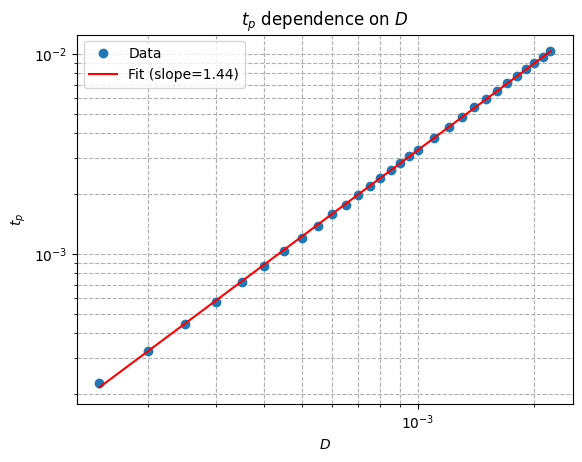

Linear regression slope: 1.4397
Linear regression intercept: 4.2319
R-squared: 0.9999


In [7]:
# prompt: create a log-log plot of the dependence of t_pinch_off_D on D add a linear regression fit to the model

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create the log-log plot
plt.figure()
plt.loglog(D[2:len(t_pinch_off_SI)], t_pinch_off_SI[2:], 'o', label='Data')

# Perform linear regression on the log-transformed data
log_D = np.log(D[2:len(t_pinch_off_SI)])
log_t_pinch_off = np.log(t_pinch_off_SI[2:])
slope, intercept, r_value, p_value, std_err = linregress(log_D, log_t_pinch_off)

# Add the linear regression fit to the plot
# The fitted line in log-log space is log(y) = m*log(x) + c, which is y = exp(c) * x^m
plt.loglog(D[2:len(t_pinch_off_SI)], np.exp(intercept) * D[2:len(t_pinch_off_SI)]**slope, 'r-', label=f'Fit (slope={slope:.2f})')

plt.xlabel('$D$')
plt.ylabel('$t_p$')
plt.title('$t_p$ dependence on $D$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Linear regression slope: {slope:.4f}")
print(f"Linear regression intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")

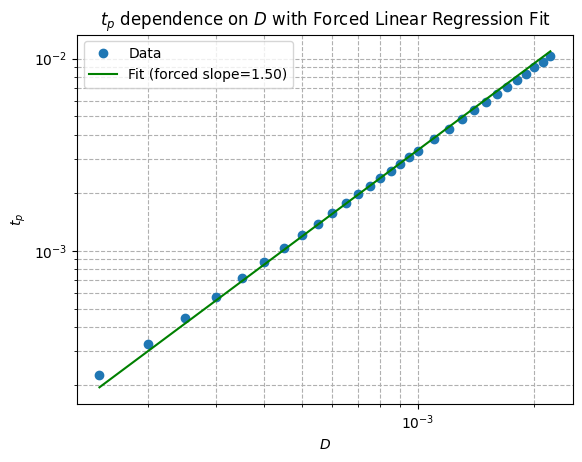

Forced linear regression slope: 1.5000
Forced linear regression intercept: 4.6617


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create the log-log plot
plt.figure()
plt.loglog(D[2:len(t_pinch_off_SI)], t_pinch_off_SI[2:], 'o', label='Data')

# Perform linear regression with a fixed slope of 1.5
log_D = np.log(D[2:len(t_pinch_off_SI)])
log_t_pinch_off = np.log(t_pinch_off_SI[2:])
forced_slope = 1.5
forced_intercept = np.mean(log_t_pinch_off - forced_slope * log_D)


# Add the linear regression fit to the plot
# The fitted line in log-log space is log(y) = m*log(x) + c, which is y = exp(c) * x^m
plt.loglog(D[2:len(t_pinch_off_SI)], np.exp(forced_intercept) * D[2:len(t_pinch_off_SI)]**forced_slope, 'g-', label=f'Fit (forced slope={forced_slope:.2f})')

plt.xlabel('$D$')
plt.ylabel('$t_p$')
plt.title('$t_p$ dependence on $D$ with Forced Linear Regression Fit')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print(f"Forced linear regression slope: {forced_slope:.4f}")
print(f"Forced linear regression intercept: {forced_intercept:.4f}")

d Oh

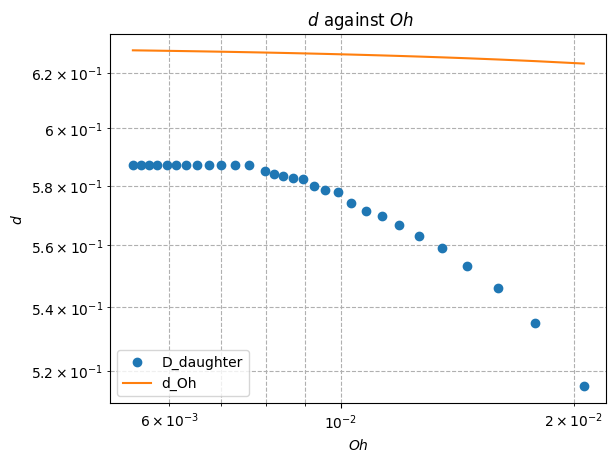

In [9]:
# prompt: create the matplot lib of D-daughter against Oh with points and draw the graph of d_Oh against Oh with continuos lines on the same graph start all arrays from index 2

import matplotlib.pyplot as plt
plt.figure()
plt.loglog(Oh[2:len(D_daughter)], D_daughter[2:], 'o', label='D_daughter')
plt.loglog(Oh[2:], d_Oh[2:], '-', label='d_Oh')
plt.xlabel('$Oh$')
plt.ylabel('$d$')
plt.title(' $d$ against $Oh$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

Interface generator



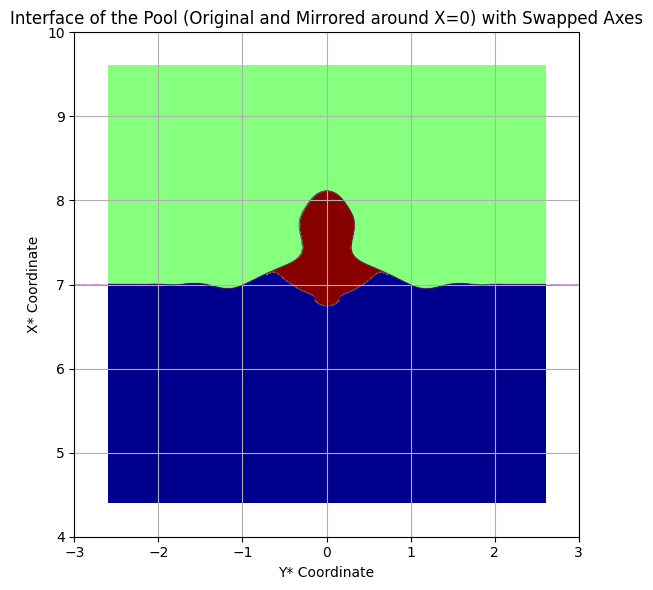

In [ ]:
file_path = '/content/INterface/10/drop_t_00.354.dat'  # your file location
background_image = '/content/INterface/10/time-00.354.png' # your image location

# Read the file and extract segments
segments = []
current_segment = []

with open(file_path, 'r') as file:
    for line in file:
        stripped = line.strip()
        if not stripped:
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            try:
                x, y = map(float, stripped.split())
                current_segment.append((x, y))
            except ValueError:
                continue

# Append the last segment if it exists
if current_segment:
    segments.append(current_segment)

# Plot the segments
plt.figure(figsize=(8, 6))
for segment in segments:
    xs, ys = zip(*segment)
    # Plot original segment with swapped x and y
    plt.plot(ys, xs, color='purple', linewidth=.25)

    # Mirror the y-coordinates around x=0 (which are now the new x-coordinates)
    # and plot the mirrored segment with swapped x and y
    ys_mirrored = [-y for y in ys]
    plt.plot(ys_mirrored, xs, color='purple', linewidth=.25)


# Load and display the original background image
img = plt.imread(background_image)
plt.imshow(img, zorder=0, extent=[-2.6, 2.6, 4.4, 9.6])

plt.title("Interface of the Pool (Original and Mirrored around X=0) with Swapped Axes")
plt.xlabel("Y* Coordinate") # Swapped axis label
plt.ylabel("X* Coordinate") # Swapped axis label
plt.grid(True)
#plt.axis("equal")
plt.xlim(-3, 3)  # Set x-axis limits
plt.ylim(4, 10)  # Set y-axis limits
plt.tight_layout()

plt.show()

In [ ]:
file_path = '/content/INterface/10/drop_t_00.354.dat'  # your file location
background_image = '/content/INterface/10/time-00.354.png' # your image location

# Read the file and extract segments
segments = []
current_segment = []

with open(file_path, 'r') as file:
    for line in file:
        stripped = line.strip()
        if not stripped:
            if current_segment:
                segments.append(current_segment)
                current_segment = []
        else:
            try:
                x, y = map(float, stripped.split())
                current_segment.append((x, y))
            except ValueError:
                continue

# Append the last segment if it exists
if current_segment:
    segments.append(current_segment)

# Plot the segments
plt.figure(figsize=(8, 6))
for segment in segments:
    xs, ys = zip(*segment)
    # Plot original segment with swapped x and y
    plt.plot(ys, xs, color='purple', linewidth=.25)

    # Mirror the y-coordinates around x=0 (which are now the new x-coordinates)
    # and plot the mirrored segment with swapped x and y
    ys_mirrored = [-y for y in ys]
    plt.plot(ys_mirrored, xs, color='purple', linewidth=.25)


# Load and display the original background image
img = plt.imread(background_image)
plt.imshow(img, zorder=0, extent=[-2.6, 2.6, 4.4, 9.6])

plt.title("Interface of the Pool (Original and Mirrored around X=0) with Swapped Axes")
plt.xlabel("Y* Coordinate") # Swapped axis label
plt.ylabel("X* Coordinate") # Swapped axis label
plt.grid(True)
#plt.axis("equal")
plt.xlim(-3, 3)  # Set x-axis limits
plt.ylim(4, 10)  # Set y-axis limits
plt.tight_layout()

plt.show()